## Ideas for Reward Function

Params we can use:
```
{
    "all_wheels_on_track": Boolean,        # flag to indicate if the agent is on the track
    "closest_waypoints": [int, int],       # indices of the two nearest waypoints.
    "distance_from_center": float,         # distance in meters from the track center 
    "is_crashed": Boolean,                 # Boolean flag to indicate whether the agent has crashed.
    "is_left_of_center": Boolean,          # Flag to indicate if the agent is on the left side to the track center or not. 
    "is_offtrack": Boolean,                # Boolean flag to indicate whether the agent has gone off track.
    "heading": float,                      # agent's yaw in degrees
    "progress": float,                     # percentage of track completed
    "speed": float,                        # agent's speed in meters per second (m/s)
    "steering_angle": float,               # agent's steering angle in degrees
    "steps": int,                          # number steps completed
    "track_length": float,                 # track length in meters.
    "track_width": float,                  # width of the track
    "waypoints": [(float, float),]        # list of (x,y) as milestones along the track center
}
```


## all_wheels_on_track

Boolean to indicate whether the agent is on-track (True) or off-track (False). If ANY of its wheelse are outside of the track borders, it is False. 

Example:
```
def reward_function(params):
    all_wheels_on_track = params['all_wheels_on_track]
    speed = params['speed']

    SPEED_THRESHOLD = 1.0

    if not all_wheels_on_track:
        # Penalize if the car goes off the track
        reward = 1e-3
    elif speed < SPEED_THRESHOLD:
        # Penalize if the car is going too slow
        reward = 0.5
    else:
        # High reward if the car stays on the track and goes fast
        reward = 1.0
    return float(reward)
```

## closest_waypoints
The zero-based indices of the two neighboring waypoints closest to the agent's current position of (x,y).
First element: the closest waypoint behind the agent
Second element: The closest waypoint in front of the agent

Example:
```
def reward_function(params):

    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    heading = params['heading']

    # Initialize the reward with a typical value
    reward = 1.0

    # Calculate the direction of the center line based on the closest waypoints
    next_point = waypoints[closest_waypoints[1]]
    prev_point = waypoints[closest_waypoints[0]]

    # Calcualte the direction in radius, arctan(dy, dx), the result is (-pi, pi) in radians
    track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0])
    # Convert to degree
    track_direction = math.degrees(track_direction)

    # Calculate the difference between the track direction and the heading direction of the car
    direction_dif = abs(track_direction - heading)
    if direction_diff > 180:
        direction_diff = 360 - direction_diff
    
    # Penalize the reward if the difference is too large
    DIRECTION_THRESHOLD = 10.0
    if direction_diff > DIRECTION_THRESHOLD:
        reward *= 0.5
    
    return float(reward)
```

## distance_from_center

Displacement, in meters, between the agent center and the track center (range is 0: ~track_width/2). The obserable max displacement occurs when any of the agent's wheels are outside a track border

Example:
```
def reward_function(params):
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']

    # Penalize if the car is too far away from the center
    marker_1 = 0.1 * track_width
    marker_2 = 0.5 * track_width

    if distance_from_center <= marker_1:
        # Close to the center
        reward = 1.0
    elif distance_from_center <= marker_2:
        # Further from the center
        reward = 0.5
    else:  
        # Probably crashed or is off track
        reward = 1e-3
    
    return float(reward)
```

## heading

Heading direction, in degrees, of the agent with respect to the x-axis coordinate system

See closest_waypoints for an example

## is_left_of_center

Boolean flag to indicate if the agent is on the left side to the track center (True) or on the right side (False)

## is_offtrack
Boolean flag to indicate whether the agent has off track (True) or not (False) as a termination status

# progress
Percentage of track completed

See steps for an example

## speed
The observed speed of the agent in m/s

See all_wheels_on_track for an example

## steering_angle

Steering angle, in degrees, of the front wheels from the center line of the agent. 

(-) means steering to the right
(+) means steering to the left

Note, the agent center line is not necessatily parallel with the track center line.

Example:
```
def reward_function(params):
    abs_steering = abs(params['steering_angle']) # We don't care whether it is left or right steering

    reward = 1.0

    # Penalize if the car is steering too much (preventing zig zags)
    ABS_STEERING_THRESHOLD = 20.0
    if abs_steering > ABS_STEERING_THRESHOLD:
        reward *= 0.8
    
    return float(reward)
```


## steps

Number of steps completed. A step corresponds to an action taken by the agent following the current policy.

Example:
```
def reward_function(params):

    steps = params['steps']
    progress = params['progress']

    # Total number of steps we want the car to finish the lap, it will vary depending on the track length
    TOTAL_NUM_STEPS = 300

    # Initialize the reward with typical value
    reward = 1.0

    # Give additional reward if the car passes every 100 steps faster than expected
    if (steps % 100) == 0 and progress > (steps / TOTAL_NUM_STEPS) * 100 :
        reward += 10.0

    return float(reward)
```

## track_length
The track length in meters

## track_width
 The track width in meters

Example:
```
def reward_function(params):
    track_width = params['track_width']
    distance_from_center = params['distance_from_center']

    # Calculate the distance from each border
    distance_from_border = 0.5 * track_width - distance_from_center

    # Reward higher if the car stays inside the track borders
    if distance_from_border >= 0.05
        reward = 1.0
    else:
        reward = 1e-3 # Low reward if too close to the border or goes off track
    
    return float(reward)
```

## waypoints

An ordered list of track dependent Max milestones along the track center. Each milestone is described by a coordinate 

In [13]:
import numpy as np
import pandas as pd
waypoints = np.load('reinvent_base.npy')
df = pd.DataFrame(waypoints)
pd.set_option('display.max_rows', None)
df.loc[:,2:3]

,2,3
0,3.059370,1.063655
1,3.208459,1.064133
2,3.359159,1.064364
3,3.508890,1.064402
4,3.658648,1.064461
5,3.808418,1.064517
6,3.958184,1.064569
7,4.107942,1.064621
8,4.257699,1.064674
9,4.407458,1.064728


Number of waypoints = 119
Waypoint 0: (3.0593700408935547, 1.0636550188064575)
Waypoint 1: (3.20845890045166, 1.0641330480575562)
Waypoint 2: (3.359158992767334, 1.064363956451416)
Waypoint 3: (3.50888991355896, 1.0644019842147827)
Waypoint 4: (3.6586480140686035, 1.0644609928131104)
Waypoint 5: (3.808418035507202, 1.0645170211791992)
Waypoint 6: (3.958184003829956, 1.0645689964294434)
Waypoint 7: (4.1079421043396, 1.0646209716796875)
Waypoint 8: (4.257699012756348, 1.0646740198135376)
Waypoint 9: (4.4074578285217285, 1.064728021621704)
Waypoint 10: (4.557218074798584, 1.0647809505462646)
Waypoint 11: (4.706972122192383, 1.064836025238037)
Waypoint 12: (4.856725215911865, 1.0648939609527588)
Waypoint 13: (5.006490230560303, 1.06495201587677)
Waypoint 14: (5.156269073486328, 1.0650049448013306)
Waypoint 15: (5.3060479164123535, 1.0650500059127808)
Waypoint 16: (5.455566883087158, 1.0651170015335083)
Waypoint 17: (5.604949951171875, 1.065335988998413)
Waypoint 18: (5.756363868713379, 1.0

<function matplotlib.pyplot.show(close=None, block=None)>

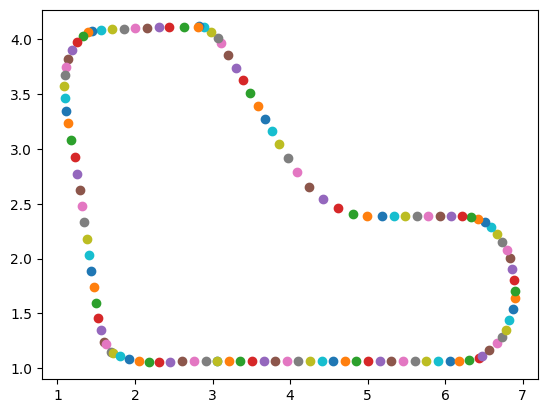

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Showing the outside waypoint
waypoints = np.load('reinvent_base.npy')
print("Number of waypoints = " + str(waypoints.shape[0]))
# Plot waypoints
for i, point in enumerate(waypoints):
    waypoint = (point[2], point[3])
    plt.scatter(waypoint[0], waypoint[1])
    print("Waypoint " + str(i) + ": " + str(waypoint))
plt.show
